In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
df=pd.read_csv(r"C:\YUG SAVLA\Coding\DJS_COMPUTE\Task_3\Data\weather_australia.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [17]:
col = ['Location','RainToday','RainTomorrow']
for c in col:
        
    print(f"Unique values in column '{c}': {df[c].unique()}")
df1=df.copy()

Unique values in column 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique values in column 'RainToday': ['No' 'Yes' nan]
Unique values in column 'RainTomorrow': ['No' 'Yes']


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [19]:
# df1['RainToday'].fillna(0,inplace=True)

In [20]:
df1.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [21]:
columns_checking =df1.columns


def null_pecentage(df1, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df1[col].isnull().sum() / len(df1)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df1, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")



Date: 0.0%
Location: 0.0%
MinTemp: 0.45%
MaxTemp: 0.23%
Rainfall: 0.99%
Evaporation: 42.79%
Sunshine: 47.69%
WindGustDir: 6.56%
WindGustSpeed: 6.52%
WindDir9am: 7.04%
WindDir3pm: 2.66%
WindSpeed9am: 0.95%
WindSpeed3pm: 1.85%
Humidity9am: 1.25%
Humidity3pm: 2.54%
Pressure9am: 9.86%
Pressure3pm: 9.83%
Cloud9am: 37.74%
Cloud3pm: 40.15%
Temp9am: 0.64%
Temp3pm: 1.92%
RainToday: 0.99%
RISK_MM: 0.0%
RainTomorrow: 0.0%


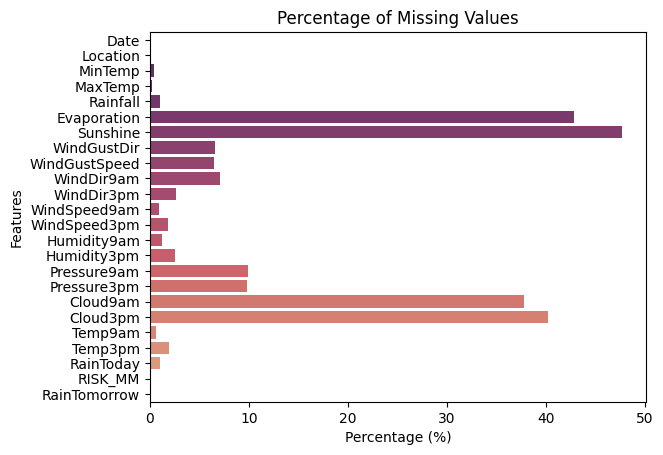

In [22]:
sns.barplot(data=null_percentage, x=null_percentage.values(), y=null_percentage.keys(), palette='flare_r', legend=False, hue=null_percentage.keys()).set(title="Percentage of Missing Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

In [23]:
df1.dropna(subset=['Pressure9am','Pressure3pm','WindGustDir','MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday',], inplace=True)

In [24]:
columns_checking =df1.columns


def null_pecentage(df1, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df1[col].isnull().sum() / len(df1)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df1, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")



Date: 0.0%
Location: 0.0%
MinTemp: 0.0%
MaxTemp: 0.0%
Rainfall: 0.0%
Evaporation: 36.43%
Sunshine: 40.98%
WindGustDir: 0.0%
WindGustSpeed: 0.0%
WindDir9am: 0.0%
WindDir3pm: 0.0%
WindSpeed9am: 0.0%
WindSpeed3pm: 0.0%
Humidity9am: 0.0%
Humidity3pm: 0.0%
Pressure9am: 0.0%
Pressure3pm: 0.0%
Cloud9am: 33.04%
Cloud3pm: 34.22%
Temp9am: 0.0%
Temp3pm: 0.0%
RainToday: 0.0%
RISK_MM: 0.0%
RainTomorrow: 0.0%


In [25]:
# Evaporation: 36.43%
# Sunshine: 40.98%
# Cloud9am: 33.04%
# Cloud3pm: 34.22%
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MinTemp        112925 non-null  float64
 3   MaxTemp        112925 non-null  float64
 4   Rainfall       112925 non-null  float64
 5   Evaporation    71781 non-null   float64
 6   Sunshine       66646 non-null   float64
 7   WindGustDir    112925 non-null  object 
 8   WindGustSpeed  112925 non-null  float64
 9   WindDir9am     112925 non-null  object 
 10  WindDir3pm     112925 non-null  object 
 11  WindSpeed9am   112925 non-null  float64
 12  WindSpeed3pm   112925 non-null  float64
 13  Humidity9am    112925 non-null  float64
 14  Humidity3pm    112925 non-null  float64
 15  Pressure9am    112925 non-null  float64
 16  Pressure3pm    112925 non-null  float64
 17  Cloud9am       75615 non-null   fl

In [30]:
df1[['Year','Month', 'Day']] = df['Date'].str.split('-', expand=True)
# df=df.drop(columns=['Issue_Date'],axis=1)
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,05


In [31]:
df1['Year'] = df1['Year'].astype(int)
df1['Month'] = df1['Month'].astype(int)
df1['Day'] = df1['Day'].astype(int)


In [32]:
columns=['Evaporation',
'Sunshine',
'Cloud9am' ,
'Cloud3pm']
for col in columns:
    mean = df1[col].mean()
    df1[col].fillna(mean, inplace=True)
    

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2928\907572747.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(mean, inplace=True)


In [33]:
columns_checking =df1.columns


def null_pecentage(df1, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df1[col].isnull().sum() / len(df1)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df1, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")



Date: 0.0%
Location: 0.0%
MinTemp: 0.0%
MaxTemp: 0.0%
Rainfall: 0.0%
Evaporation: 0.0%
Sunshine: 0.0%
WindGustDir: 0.0%
WindGustSpeed: 0.0%
WindDir9am: 0.0%
WindDir3pm: 0.0%
WindSpeed9am: 0.0%
WindSpeed3pm: 0.0%
Humidity9am: 0.0%
Humidity3pm: 0.0%
Pressure9am: 0.0%
Pressure3pm: 0.0%
Cloud9am: 0.0%
Cloud3pm: 0.0%
Temp9am: 0.0%
Temp3pm: 0.0%
RainToday: 0.0%
RISK_MM: 0.0%
RainTomorrow: 0.0%
Year: Column not found
Month: Column not found
Day: Column not found


In [ ]:
df1.info()

In [34]:
# List of columns to encode
columns_to_encode = [
    'WindGustDir', 
    'Location', 
    'WindDir9am', 
    'WindDir3pm', 
    'RainToday', 
    'RainTomorrow',
   
]
# Loop through the columns and apply LabelEncoder
for column in columns_to_encode:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])

In [35]:
# df1.info()
df1.drop(columns=['Date'],inplace=True)

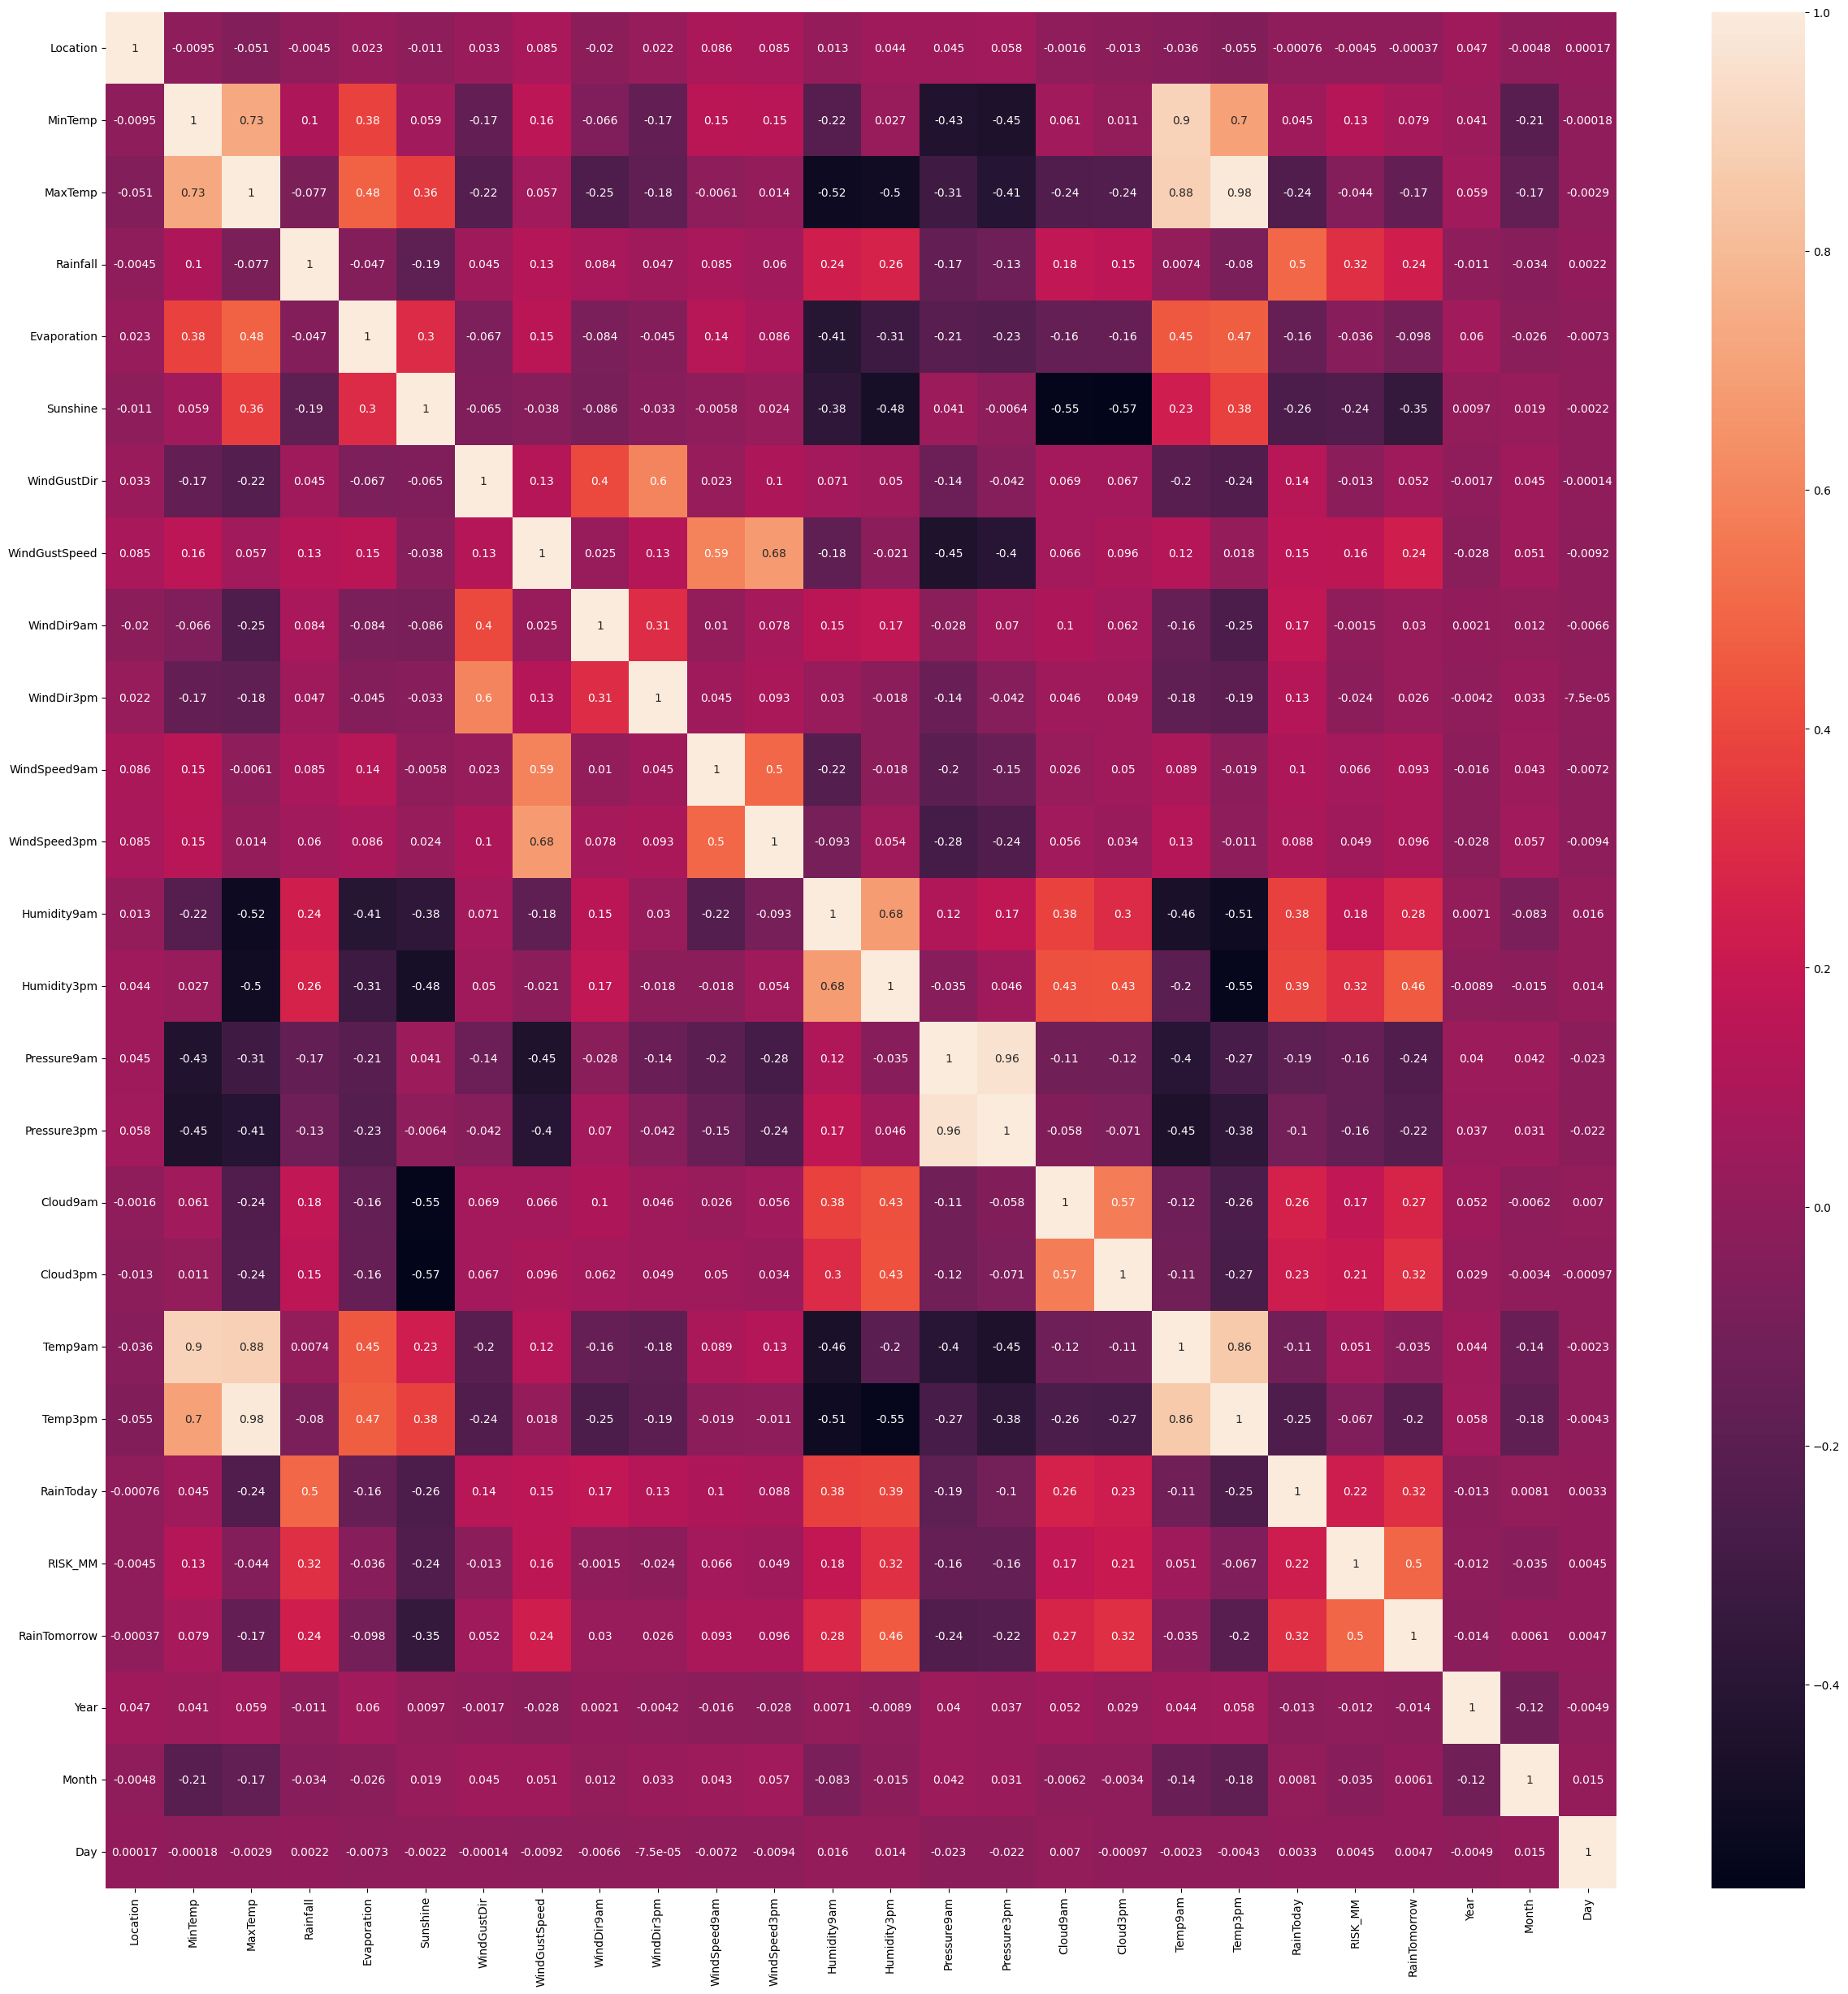

In [36]:
corr = df1.corr(numeric_only=True)

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

plt.show()


In [37]:
df1.drop(columns=['Location','MinTemp','Evaporation','WindGustDir','WindDir3pm','WindSpeed9am','WindSpeed3pm','Temp9am','Year','Month','Day'],inplace=True)

In [38]:
# df.drop(columns=['MinTemp','WindSpeed9am','WindSpeed3pm','Temp9am' ],inplace=True)


In [39]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 142192
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        112925 non-null  float64
 1   Rainfall       112925 non-null  float64
 2   Sunshine       112925 non-null  float64
 3   WindGustSpeed  112925 non-null  float64
 4   WindDir9am     112925 non-null  int32  
 5   Humidity9am    112925 non-null  float64
 6   Humidity3pm    112925 non-null  float64
 7   Pressure9am    112925 non-null  float64
 8   Pressure3pm    112925 non-null  float64
 9   Cloud9am       112925 non-null  float64
 10  Cloud3pm       112925 non-null  float64
 11  Temp3pm        112925 non-null  float64
 12  RainToday      112925 non-null  int32  
 13  RISK_MM        112925 non-null  float64
 14  RainTomorrow   112925 non-null  int32  
dtypes: float64(12), int32(3)
memory usage: 12.5 MB


In [40]:
# df1['RainTomorrow'].value_counts()

RainTomorrow
0    87906
1    25019
Name: count, dtype: int64

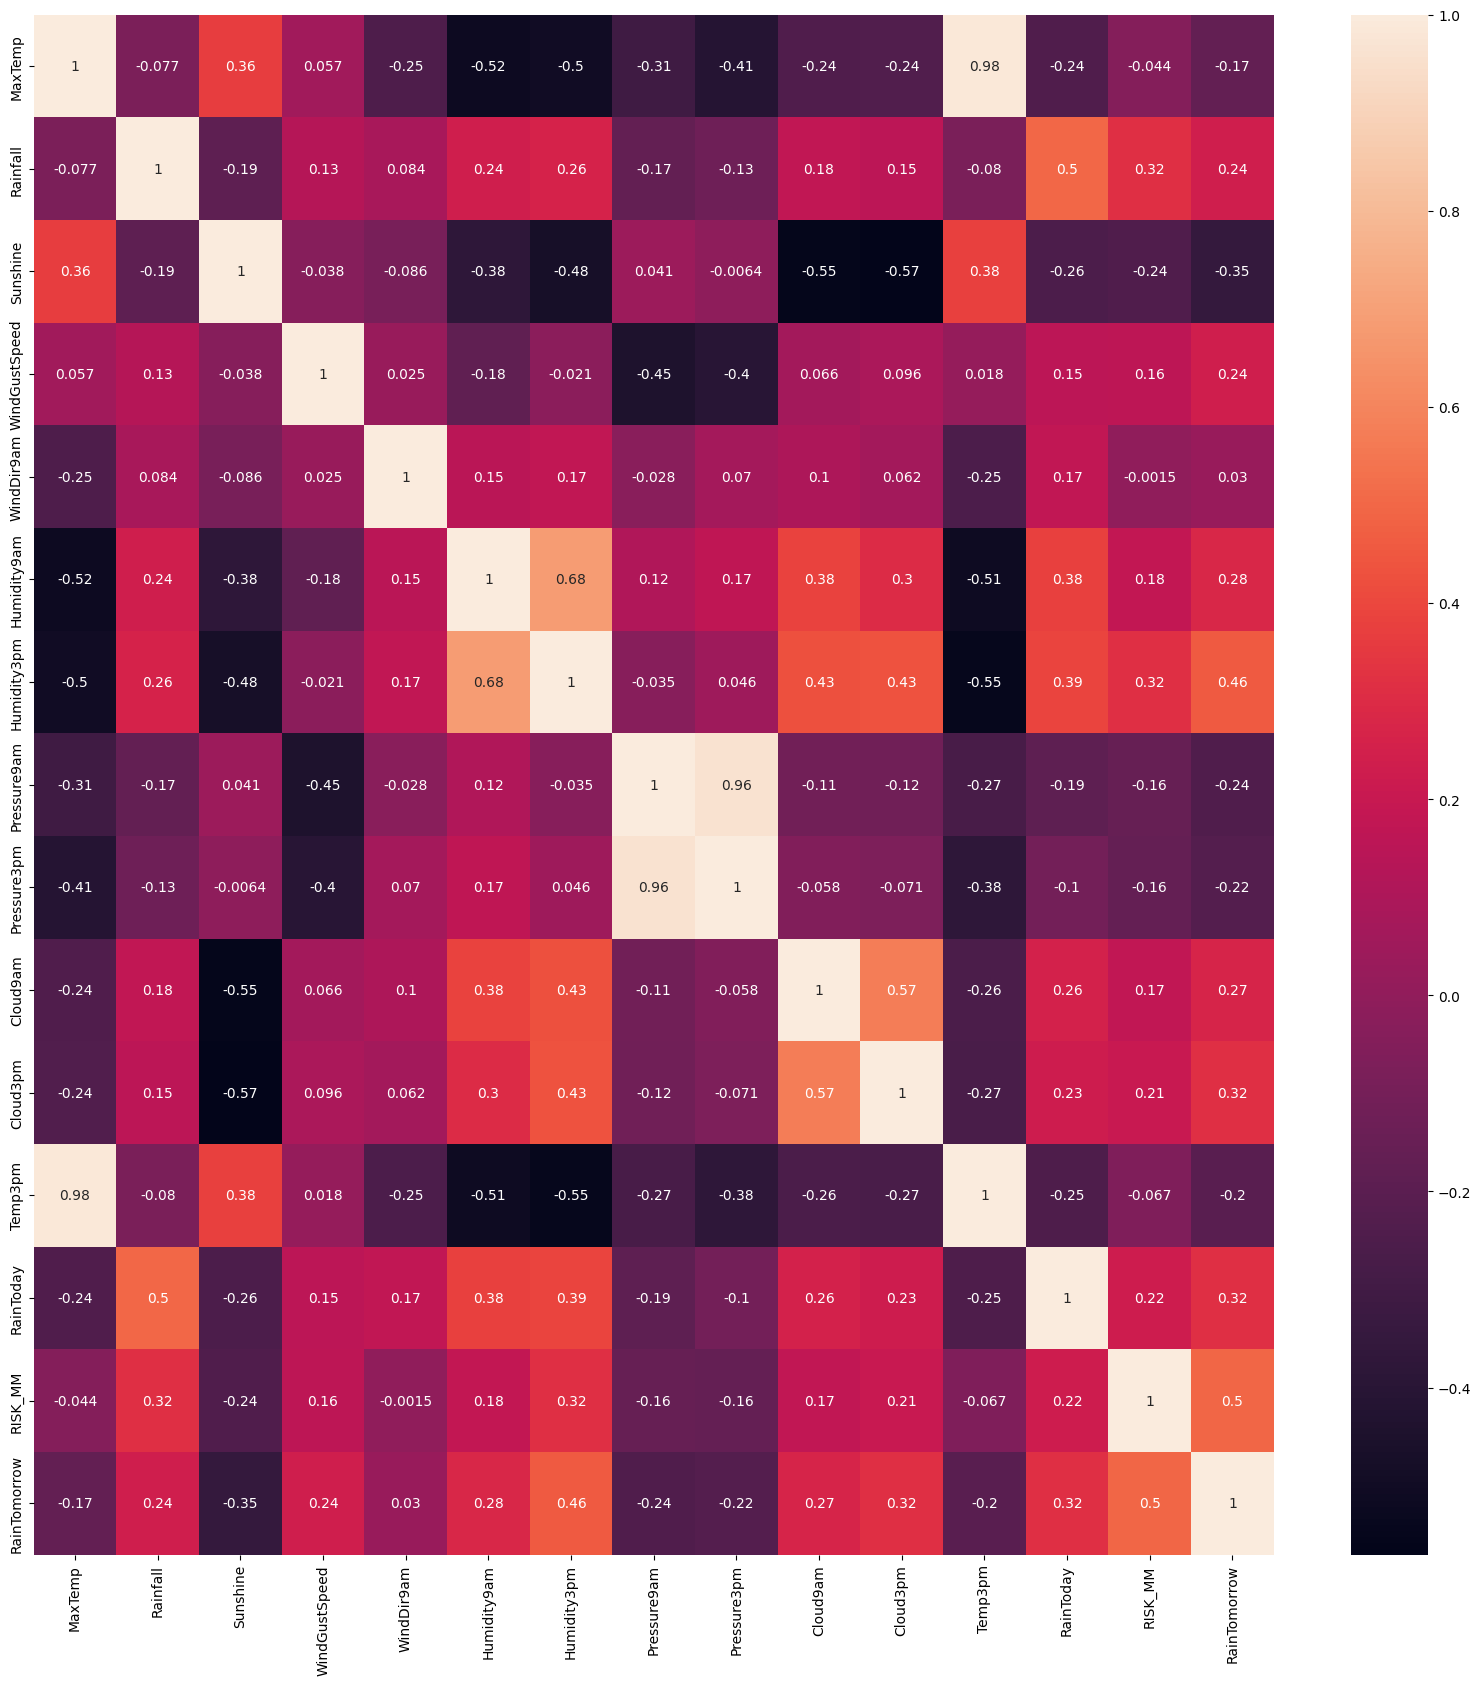

In [41]:
corr = df1.corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

plt.show()


In [47]:
X = df1.iloc[:, :-2]
y=df1.iloc[:,-1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = model.predict(X_test)


In [51]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8418862076599513
Confusion Matrix:
[[16558   966]
 [ 2605  2456]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     17524
           1       0.72      0.49      0.58      5061

    accuracy                           0.84     22585
   macro avg       0.79      0.72      0.74     22585
weighted avg       0.83      0.84      0.83     22585



In [54]:
from sklearn.metrics import recall_score,precision_score,f1_score


In [56]:
print("Precision - ",precision_score(y_test,y_pred))
print("Recall - ",recall_score(y_test,y_pred))
print("F1 score - ",f1_score(y_test,y_pred))

Precision -  0.7177089421391
Recall -  0.48527958901402884
F1 score -  0.5790404338087941
